In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Exploring Data

In [16]:
train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [13]:
train.describe()

,id,winner_model_a,winner_model_b,winner_tie
count,5.747700e+04,57477.000000,57477.000000,57477.000000
mean,2.142564e+09,0.349079,0.341911,0.309011
std,1.238327e+09,0.476683,0.474354,0.462090
min,3.019200e+04,0.000000,0.000000,0.000000
25%,1.071821e+09,0.000000,0.000000,0.000000
50%,2.133658e+09,0.000000,0.000000,0.000000
75%,3.211645e+09,1.000000,1.000000,1.000000
max,4.294947e+09,1.000000,1.000000,1.000000


### Total models, prompts and corresponding responses and duplicates

In [23]:
train.model_b.nunique()
for col in train.columns:
    if train[col].dtype=='O':
       print(col + ':',train[col].nunique()) 

model_a: 64
model_b: 64
prompt: 51734
response_a: 56566
response_b: 56609


The number of responses are less than promplts which indicates duplication in responses.

In [34]:
# Duplicate respones from 'model_a'
df[train['response_a'].duplicated()].response_a

823      ["I'm not able to help with that, as I'm only ...
947                 ["Hello! How can I assist you today?"]
1035                ["Hello! How can I assist you today?"]
1100                ["Hello! How can I assist you today?"]
1243     ["Hello! How can I help you today? If you have...
                               ...                        
57388                                                ["C"]
57440    ["Sure, here are my answers:\n\n1. Disagree\n2...
57449               ["Hello! How can I assist you today?"]
57464                           ["Sarah has two sisters."]
57468    ["I am trained to understand and respond only ...
Name: response_a, Length: 911, dtype: object

In [37]:
# Duplicate respones from 'model_b'
df[train['response_a'].duplicated()].response_b

823      ["Napoleone Bonaparte (1769-1821) \u00e8 stato...
947                   ["Hello! How can I help you today?"]
1035                ["Hello! How can I assist you today?"]
1100     ["Sure! Here's an example of how you can imple...
1243     ["I don't have a response to random strings of...
                               ...                        
57388                                    ["B: The bricks"]
57440    ["1. Agree\n2. Agree\n3. Agree\n4. Disagree\n5...
57449    ["It's great to see you again! I'm here to hel...
57464                            ["Sarah has one sister."]
57468    ["Here is a possible Bewerbungsanschreiben in ...
Name: response_b, Length: 911, dtype: object

## Distribution of target variables
We have three target variables: winner_model_a, winner_model_b, winner_tie. We intend to know frequency of the winns of model_a, model_b and ties.

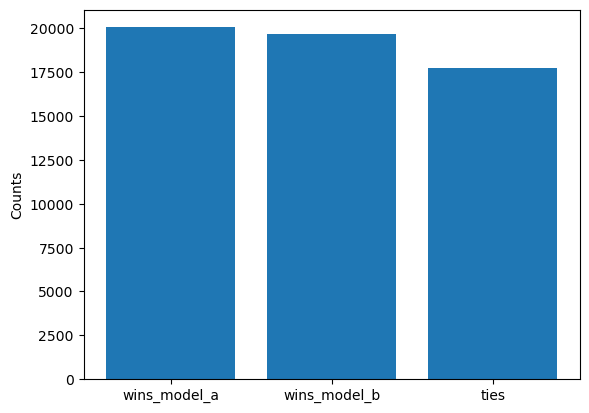

winner_model_a    20064
winner_model_b    19652
winner_tie        17761
dtype: int64


In [54]:
wins = ['wins_model_a', 'wins_model_b','ties']
plt.bar(x=wins, height=train[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())
plt.ylabel('Counts')
plt.show()

print(train[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())

## Text Prerpocessing

In [115]:
import nltk
from nltk.corpus import stopwords
import string

In [60]:
df.head(3)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1


In [150]:
def process_text(text):
    # lower case
    text = text.lower()
    # '\\n' character removed:
    text=text.replace("\\n"," " )
    # remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # remove digits
    text = ''.join([char for char in text if char not in string.digits])
    # remove stopwords
    stop_words = stopwords.words('english')
    words = nltk.word_tokenize(text)
    filtered_words =[word for word in words if word not in stop_words]
    filtered_text = " ".join(filtered_words)
    return filtered_text

# applying the processing techniques
train['prompt'] = train['prompt'].apply(process_text)
train['response_a'] = train['response_a'].apply(process_text)
train['response_b'] = train['response_b'].apply(process_text)


In [152]:
# pickling the dataframe
train.to_pickle('train.pkl')